In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch Version
# print(torch.__version__)  Print If want to

# Create  Known Parameters
weight  = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(1)
y = weight * X + bias

print(X[:10],y[:10]) # First 10 of X and First 10 of y.
print(len(X),len(y)) # Total length of X and y.

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50


In [ ]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split] , y[:train_split]  # Every value upto the Train_split which is 80% of data in our case we've 40.
X_test,y_test   = X[train_split:] , y[train_split:]  # Every value onwards of the Train_split which 10% of data in our case we've 10.

print(len(X_train),len(y_train),len(X_test),len(y_test))


40 40 10 10


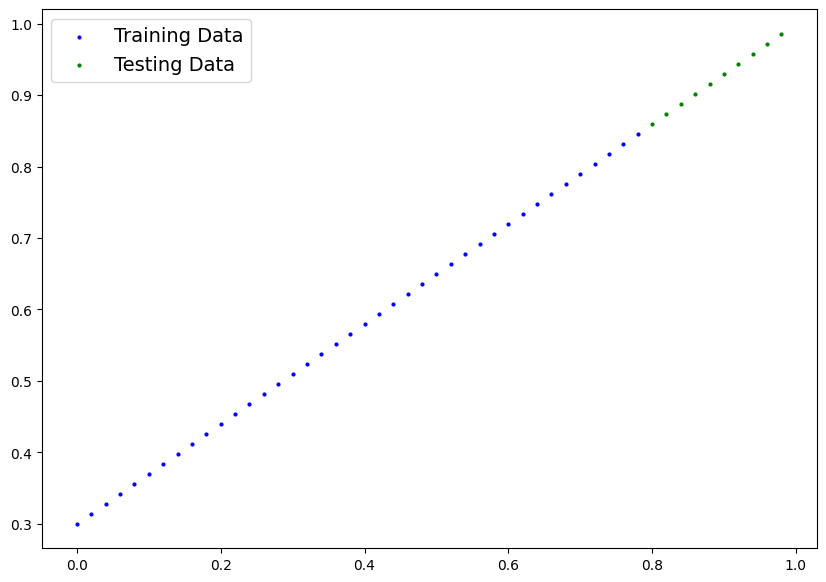

In [ ]:
def plot_predictions(train_data = X_train,
                     train_lebels = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions= None ):

# Plots training data,

 plt.figure(figsize =(10,7))

# Plot training data in blue

 plt.scatter(train_data,train_lebels, c="b",s=4 , label ="Training Data")

# Plot test data in green
 plt.scatter(test_data,test_label,c="g",s=4,label="Testing Data")

# Are there Predictions?

 if predictions is not None:
# Plot the predictions if they exits
      plt.scatter(test_data,predictions , c="r", s=4 , label="Predictions")
 plt.legend(prop={"size":14})

plot_predictions()

## 2. Build Model

Our first PyTorch model!
This is very exciting....Let's do it!
What are Our Model does:

(1) Start with Random values(weight & bias):

(2) Look at training data and adjust the random values to better represent(or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it to do so?

Throught 2 main algorithms

(1) Gradient descent

(2) BackPropagation

In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):# <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,   #   <-- Start with random weight and try adjustto the ideal weight
                                              requires_grad=True, #  <-- can this parameter be updated via gradient descent?
                                              dtype = torch.float)) # <-- PyTorch loves the dataType torch.float32?

      self.bias = nn.Parameter(torch.randn(1,  #   <-- Start with random weight and try adjustto the ideal bias
                                           requires_grad=True, #  <-- can this parameter be updated via gradient descent?
                                           dtype=torch.float)) # <-- PyTorch loves the dataType torch.float32?
    #Forward method to define the computations in the model
    def forward(self,x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias  # this is the linear regression formula

### PyTorch model building essential

* torch.nn - contains all of the buildings for computational graphs(a neural network can be considered a computational graph).
* torch.nn.Parameter - what parameters should our model try and learn, oftern a PyTorch layer from torch.nn will set these for us.
* torch.nn.Model - The base class for all neural network modules,if you subclass it, you should overwrite forward().
* torch.optim - this where the optimizers in PyTorch live,they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwrite forward(),this method defines what happens in the forward computation.

### Checking the contens of our PyTorch model
Now we've created a model,let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)   # <- ye humne manual seed islie use kia hai take same output hr dafa q k parameters random hain humare ps

# Create an instance of the model (This is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters()) # <-- yahan simple parameters k andr random seed main jo bhi value ayi hain unhe dekh rhe hain aur list is lie lagaya hai take list ki form main miljaye parms ki value

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()  # <-- This gives us the dictionary of the parmeters of the model

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# The whole goal is to make closer upto the actual value of weight and bias
weight,bias


(0.7, 0.3)

### Making prediction using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.
When we pass data through our model, it's going to run it through the forward() method.

In [ ]:
# Make predictions with model
"""
yani s simple hm ye dekh rhe hain huamare
jo model hai wo prediction k bd kitna acha
result deta hai yani jo abhi hm prediction krenge
torch.inference_model() uska result humare y_test
se kitna dor hota hai, Let's chk it...
"""

with torch.inference_mode():
  y_preds = model_0(X_test)
  #    Note:   <----- You can do alot same with torch.no_grad like the inference_mode() but the inference_mode() is prefered.
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

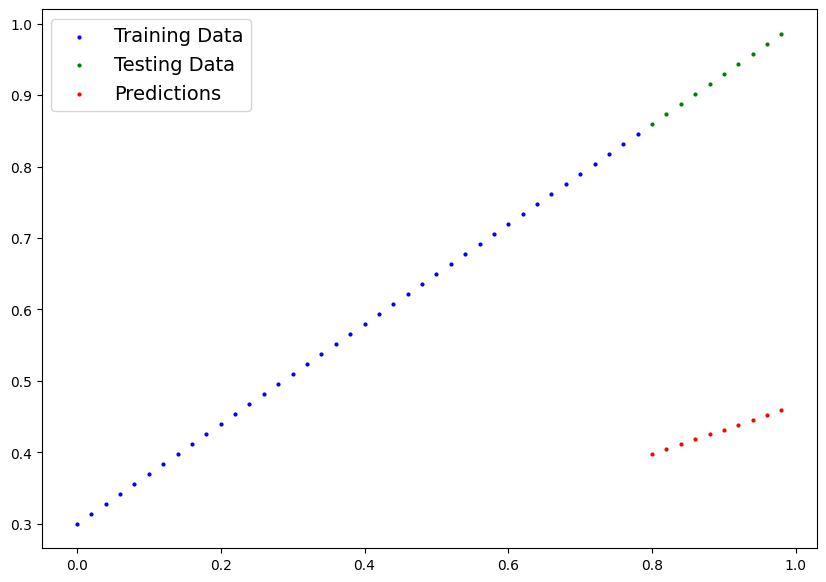

In [ ]:
plot_predictions(predictions=y_preds)

# Ah! It's so far from Y_tests that the predictions we made so we try to reduce the gap b/w Predictions and the Tests.

## 3. Train model
The whole idea of training is for a model to move from some unknown parameters(these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in defferent areas. For our case,we're going to refer to it as a loss function.

  * Inside the optimizer you'll often have to set 2 parameters:
    * `params`- the model parameters you'd like to optimize, for example  `params=model_0.parameters()`
    * `lr` (learning rate)- the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small `lr` results in a small changes, a large `lr` results in large changes)

Things we need to train:
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g. weight & biases in our case) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1) #lr = learning rate = possible the most important hyperparameter you can set.

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific.But with experience,you'll get an idea of what workds and what doesn't with your particular problem set.
For example,for a regression problem(like ours), a loss function of `nn.L1Loss()`and an optimizer like `torch.optim.SGD()`will suffice.
But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop(and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data.
1.Forward pass (this involves data moving through our model's `forward()`functions) to make predictions on data - also called forward propagation
2.Calculate teh loss (compare forward pass predictions to ground truth labels)
3.Optimizer zero grad
4.Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss.(**backpropagation**)
5.Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss.(**gradient descent**)

In [ ]:
#Yad krna hai yeh Training kr rha hai model ki
torch.manual_seed(42)
# An epoch is one loops through the data... (this is a hyperparameter we've set it ourselves)
epochs = 100

# 0. Loops through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradient to require gradients

  # 1.Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train)
  print(f"Loss:{loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perforom backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (persfom gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step3 for the next iteration of the loop.

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (droupout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}| Loss:{loss} | Test loss:{test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Loss:0.07543627172708511
Epoch: 0| Loss:0.07543627172708511 | Test loss:0.01536894403398037
OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])
Loss:0.039773717522621155
Loss:0.07543627172708511
Loss:0.039773717522621155
Loss:0.07543627172708511
Loss:0.039773717522621155
Loss:0.07543627172708511
Loss:0.039773717522621155
Loss:0.07543627172708511
Loss:0.039773717522621155
Loss:0.07543627172708511
Epoch: 10| Loss:0.07543627172708511 | Test loss:0.01536894403398037
OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])
Loss:0.039773717522621155
Loss:0.07543627172708511
Loss:0.039773717522621155
Loss:0.07543627172708511
Loss:0.039773717522621155
Loss:0.07543627172708511
Loss:0.039773717522621155
Loss:0.07543627172708511
Loss:0.039773717522621155
Loss:0.07543627172708511
Epoch: 20| Loss:0.07543627172708511 | Test loss:0.01536894403398037
OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])
Loss:0.039773717522621155
Loss:0.0754362717

In [ ]:
# Loss:0.31288138031959534
# Epoch: 0| Loss:0.31288138031959534 | Test loss:0.35982614755630493
# OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6122])), ('bias', tensor([0.2588]))])

In [ ]:
weight,bias

(0.7, 0.3)

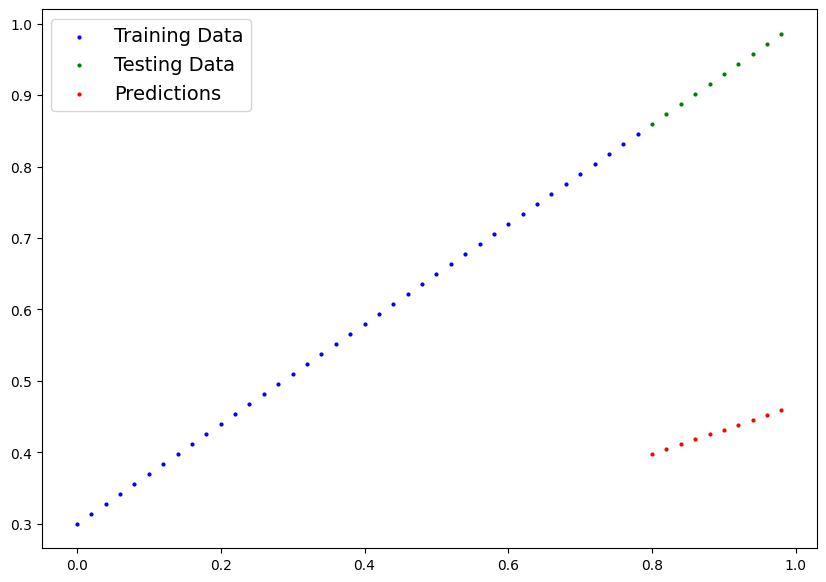

In [ ]:
plot_predictions(predictions=y_preds)

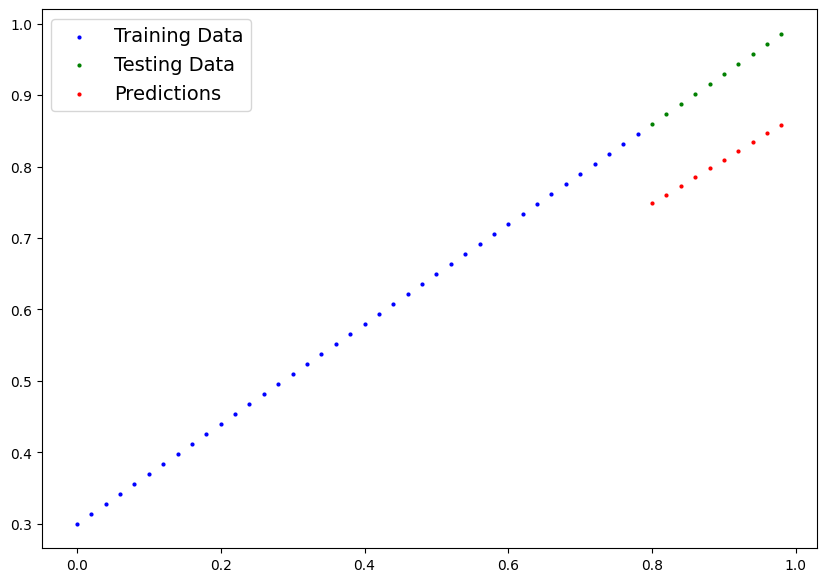

In [ ]:
plot_predictions(predictions=y_preds_new)